In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/worldwide1/region_compared.csv
/kaggle/input/worldwide1/region_google-search.csv
/kaggle/input/worldwide1/overall.csv
/kaggle/input/worldwide1/region_chatgpt.csv


### Import Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

### Load DataSets

In [31]:
world = pd.read_csv("/kaggle/input/worldwide1/overall.csv", skiprows=2)
country = pd.read_csv("/kaggle/input/worldwide1/region_google-search.csv", skiprows=2)
country1 = pd.read_csv("/kaggle/input/worldwide1/region_chatgpt.csv", skiprows=2)
region = pd.read_csv("/kaggle/input/worldwide1/region_compared.csv", skiprows=2)

In [32]:
print(world.columns)


Index(['Month', 'ChatGPT: (Worldwide)', 'Google Search: (Worldwide)'], dtype='object')


In [33]:
world.columns = [col.strip() for col in world.columns]
world.columns
world.head()

,Month,ChatGPT: (Worldwide),Google Search: (Worldwide)
0,2004-01,0,8
1,2004-02,0,8
2,2004-03,0,9
3,2004-04,0,9
4,2004-05,0,9


In [34]:
world["Month"] = pd.to_datetime(world["Month"])

# Convert values (replace "<1" with 1 if needed)
world["ChatGPT: (India)"] = world["ChatGPT: (Worldwide)"].replace("<1", 1).astype(int)
world["Google Search: (India)"] = world["Google Search: (Worldwide)"].astype(int)

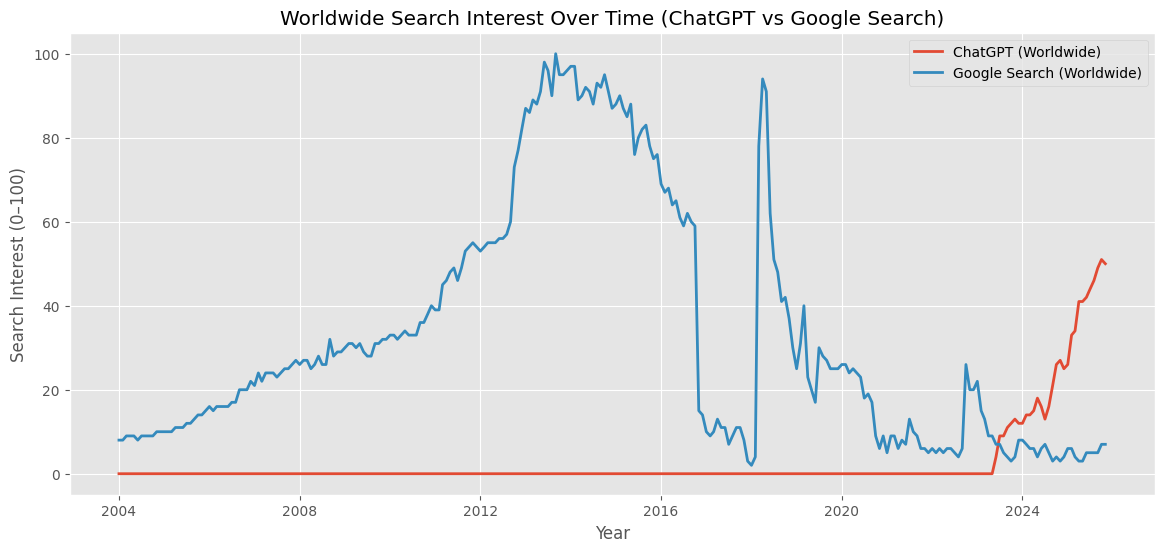

In [35]:
plt.figure(figsize=(14,6))

plt.plot(world["Month"], world["ChatGPT: (Worldwide)"], label="ChatGPT (Worldwide)", linewidth=2)
plt.plot(world["Month"], world["Google Search: (Worldwide)"], label="Google Search (Worldwide)", linewidth=2)

plt.title("Worldwide Search Interest Over Time (ChatGPT vs Google Search)")
plt.xlabel("Year")
plt.ylabel("Search Interest (0–100)")
plt.legend()
plt.show()

In [36]:
country_clean = country.dropna().copy()

country_clean["Google Search"] = country_clean["Google Search: (1/1/04 - 11/18/25)"].astype(int)
country_clean = country_clean[["Country", "Google Search"]]
country_clean

,Country,Google Search
0,Morocco,100
3,Tunisia,91
5,Algeria,84
8,Pakistan,76
12,Jordan,70
...,...,...
231,China,20
234,Kazakhstan,19
236,Russia,17
237,South Korea,17


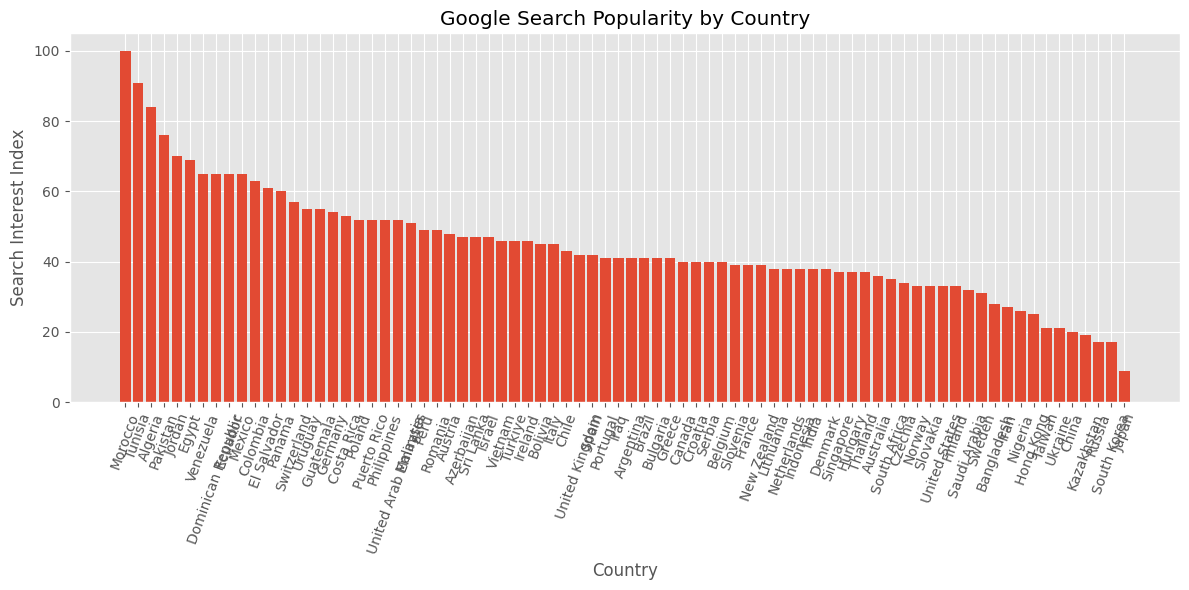

In [37]:
plt.figure(figsize=(12,6))

plt.bar(country_clean["Country"], country_clean["Google Search"])

plt.title("Google Search Popularity by Country")
plt.xlabel("Country")
plt.ylabel("Search Interest Index")
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

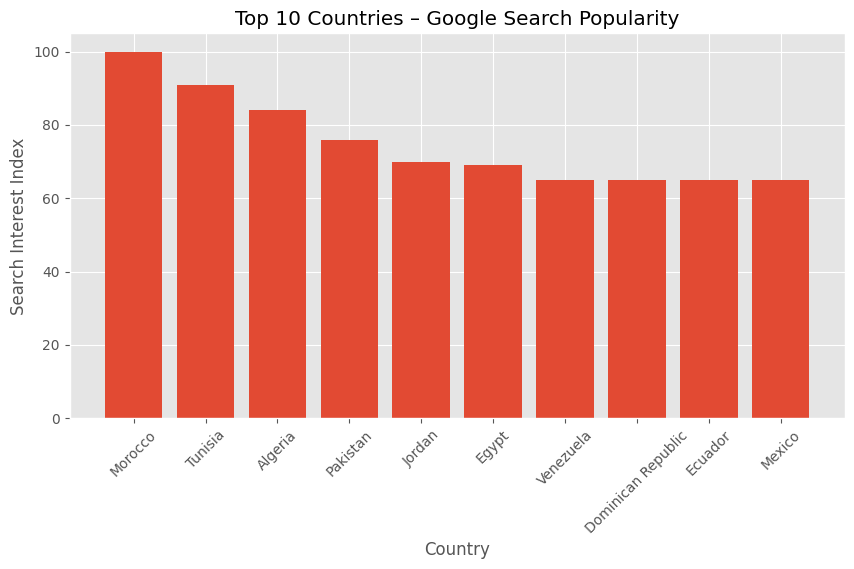

In [38]:
top10 = country_clean.sort_values("Google Search", ascending=False).head(10)
top10

plt.figure(figsize=(10,5))
plt.bar(top10["Country"], top10["Google Search"])

plt.title("Top 10 Countries – Google Search Popularity")
plt.xlabel("Country")
plt.ylabel("Search Interest Index")
plt.xticks(rotation=45)
plt.show()

In [39]:
# Drop empty rows
chatgpt_clean = country1.dropna().copy()

# Convert ChatGPT values to integer
chatgpt_clean["ChatGPT"] = chatgpt_clean["ChatGPT: (1/1/04 - 11/18/25)"].astype(int)

# Keep only needed columns
chatgpt_clean = chatgpt_clean[["Country", "ChatGPT"]]

chatgpt_clean

,Country,ChatGPT
10,Philippines,100
11,Nepal,96
12,Sri Lanka,92
17,Pakistan,80
19,Kenya,75
...,...,...
215,Finland,12
218,Japan,11
222,Iran,10
223,China,10


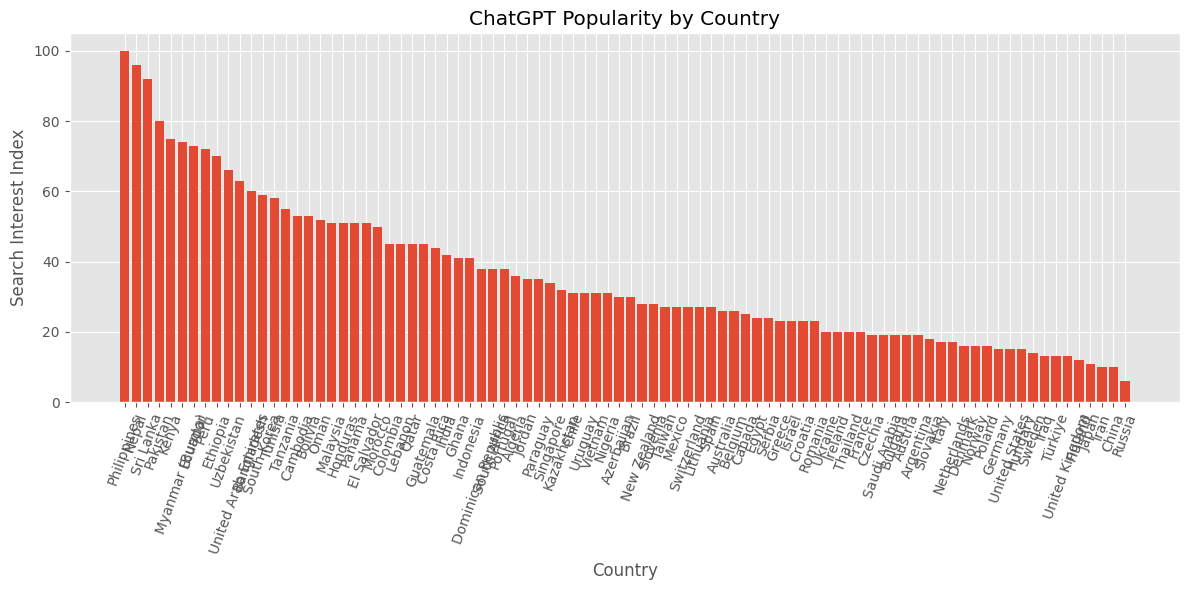

In [40]:
plt.figure(figsize=(12,6))

plt.bar(chatgpt_clean["Country"], chatgpt_clean["ChatGPT"])

plt.title("ChatGPT Popularity by Country")
plt.xlabel("Country")
plt.ylabel("Search Interest Index")
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

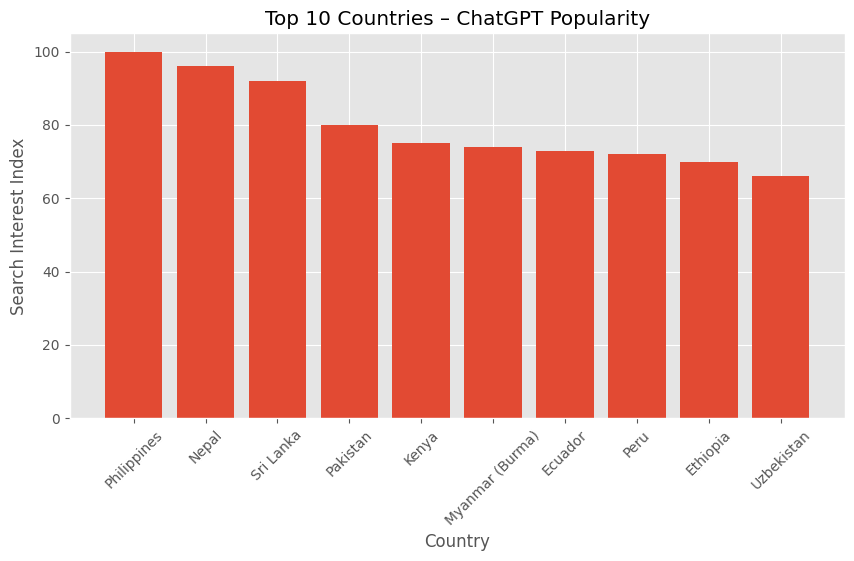

In [41]:
top10_chatgpt = chatgpt_clean.sort_values("ChatGPT", ascending=False).head(10)
top10_chatgpt

plt.figure(figsize=(10,5))
plt.bar(top10_chatgpt["Country"], top10_chatgpt["ChatGPT"])

plt.title("Top 10 Countries – ChatGPT Popularity")
plt.xlabel("Country")
plt.ylabel("Search Interest Index")
plt.xticks(rotation=45)
plt.show()


In [42]:
# Drop fully empty rows
region_clean = region.dropna(subset=["ChatGPT: (1/1/04 - 11/18/25)", 
                                     "Google Search: (1/1/04 - 11/18/25)"], how="all").copy()

# Remove '%' and convert to integers
region_clean["ChatGPT"] = region_clean["ChatGPT: (1/1/04 - 11/18/25)"].str.replace("%","").astype(int)
region_clean["Google Search"] = region_clean["Google Search: (1/1/04 - 11/18/25)"].str.replace("%","").astype(int)

region_clean = region_clean[["Country", "ChatGPT", "Google Search"]]
region_clean


,Country,ChatGPT,Google Search
10,Philippines,29,71
11,Nepal,42,58
12,Sri Lanka,30,70
17,Pakistan,19,81
19,Kenya,41,59
...,...,...,...
215,Finland,7,93
218,Japan,22,78
222,Iran,7,93
223,China,9,91


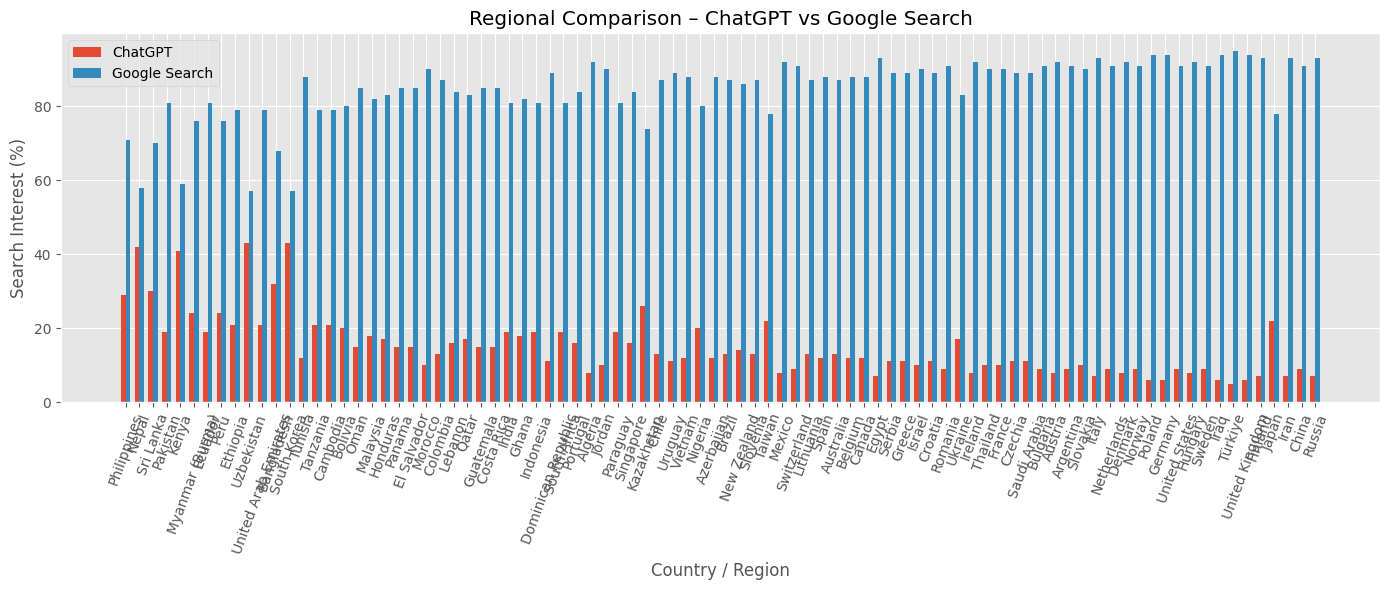

In [43]:
import numpy as np

plt.figure(figsize=(14,6))

x = np.arange(len(region_clean))
width = 0.35

plt.bar(x - width/2, region_clean["ChatGPT"], width, label="ChatGPT")
plt.bar(x + width/2, region_clean["Google Search"], width, label="Google Search")

plt.xticks(x, region_clean["Country"], rotation=70)
plt.xlabel("Country / Region")
plt.ylabel("Search Interest (%)")
plt.title("Regional Comparison – ChatGPT vs Google Search")
plt.legend()
plt.tight_layout()
plt.show()


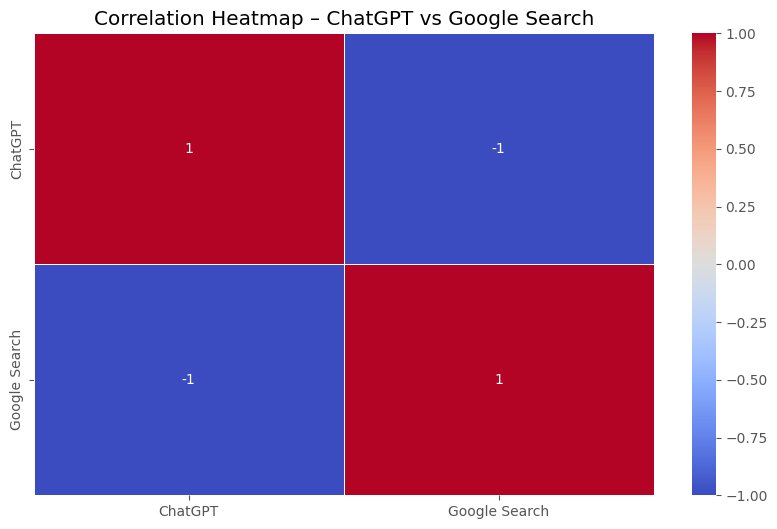

In [44]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(region_clean[["ChatGPT", "Google Search"]].corr(), 
            annot=True, cmap="coolwarm", linewidths=.5)

plt.title("Correlation Heatmap – ChatGPT vs Google Search")
plt.show()


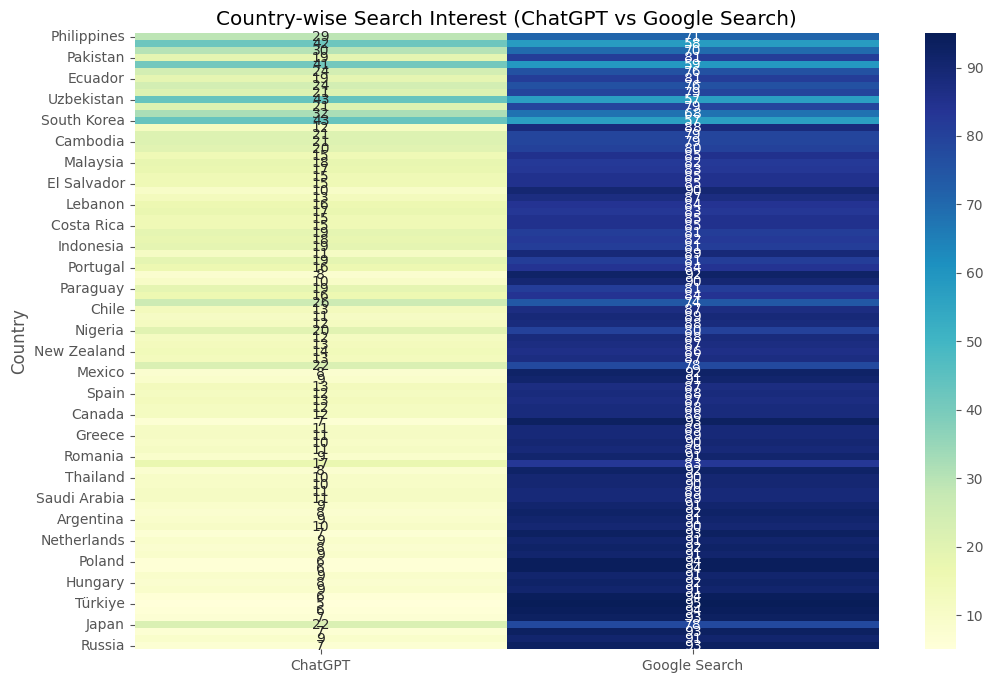

In [45]:
plt.figure(figsize=(12,8))
sns.heatmap(region_clean.set_index("Country"), annot=True, cmap="YlGnBu")
plt.title("Country-wise Search Interest (ChatGPT vs Google Search)")
plt.show()


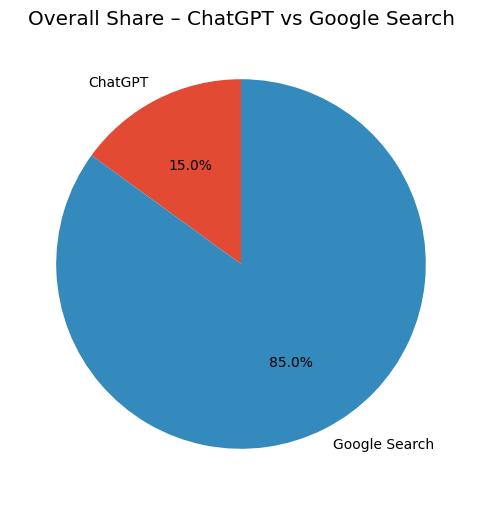

In [46]:
total_chatgpt = region_clean["ChatGPT"].sum()
total_google = region_clean["Google Search"].sum()

plt.figure(figsize=(6,6))
plt.pie([total_chatgpt, total_google], 
        labels=["ChatGPT", "Google Search"],
        autopct="%1.1f%%", 
        startangle=90)

plt.title("Overall Share – ChatGPT vs Google Search")
plt.show()


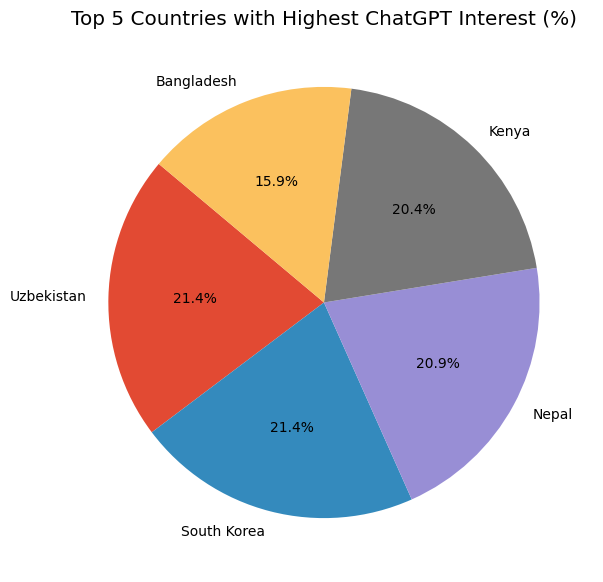

In [49]:
top5 = region_clean.sort_values("ChatGPT", ascending=False).head(5)

plt.figure(figsize=(7,7))
plt.pie(top5["ChatGPT"], labels=top5["Country"], autopct="%1.1f%%", startangle=140)
plt.title("Top 5 Countries with Highest ChatGPT Interest (%)")
plt.show()


In [47]:
region_clean["Gap (Google - ChatGPT)"] = region_clean["Google Search"] - region_clean["ChatGPT"]

summary_table = region_clean.sort_values("Gap (Google - ChatGPT)", ascending=True)
summary_table


,Country,ChatGPT,Google Search,Gap (Google - ChatGPT)
38,South Korea,43,57,14
30,Uzbekistan,43,57,14
11,Nepal,42,58,16
19,Kenya,41,59,18
36,Bangladesh,32,68,36
...,...,...,...,...
195,Poland,6,94,88
199,Germany,6,94,88
209,Iraq,6,94,88
212,United Kingdom,6,94,88


In [48]:
correlation = region_clean[["ChatGPT", "Google Search"]].corr()
print("Correlation between ChatGPT and Google Search:")
print(correlation)


Correlation between ChatGPT and Google Search:
               ChatGPT  Google Search
ChatGPT            1.0           -1.0
Google Search     -1.0            1.0


### Brief Summary

- This analysis compares global search interest in ChatGPT and Google Search using Google Trends data. The results show that Google Search remains dominant worldwide, with consistently high interest since 2004. In contrast, ChatGPT shows a sudden rise starting from late 2022, reflecting its rapid adoption as an AI-based information tool.
- Region-wise data reveals that countries like Nepal, Kenya, Uzbekistan, Sri Lanka, and the Philippines show higher relative interest in ChatGPT, while Google Search continues to lead strongly across most regions. Heatmaps and percentage comparisons highlight the widening but uneven adoption of AI tools globally.
- Overall, the visualizations indicate that while Google Search continues to be the primary gateway for information, the growing popularity of ChatGPT marks a significant shift in user behavior toward conversational and AI-driven search experiences.